

## Lab 2

Welcome to the second lab of the AIML!
In addition to implementing code, there will be questions that you must answer which relate to the lab and your implementation. Each question you will answer is preceded by a **'Question X'** header. Carefully read each question and provide you answer or code in the following textboxes with **'Answer:'** header. Your lab submission will be evaluated based on your answers to each of the questions and the implementation you provide.

# Every question is of 1 mark.

## Overview

In [7]:
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Probabilty Distributions

5) Linear Regression

## Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

Hint: You can import ttest function from scipy to perform t tests 

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

#### Answer:

In [8]:
import pandas as pd
GPU1 = pd.DataFrame([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = pd.DataFrame([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

In [10]:
#this test assumes the two groups have no significant difference
t_statistic, p_value = ttest_ind(GPU1, GPU2)
print(t_statistic, p_value)

[-2.62762951] [0.01379428]


In [11]:
# p_value < 0.05 => alternative hypothesis:
print ("R2_Internal t-test p-value=", p_value)

R2_Internal t-test p-value= [0.01379428]


#Conclusion
 if P value is low( derived pvalue =0.01 which is less than 0.05), reject H0
 Hence alternate Hypothesis is right, that is "There is a significant difference between GPU1 and GPU2"


[## Question 2 
](https://)
He is trying a third GPU which is GPU3.

In [12]:
GPU3 = pd.DataFrame([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

Null Hypothesis : There is no significant difference between data sets of GPU1 and GPU3
Alternate Hypothesis : There is a significant difference

Do two-sample testing between GPU1 and GPU3 and check whether to reject Null Hypothesis or not.


In [13]:
import pandas as pd
GPU1 = pd.DataFrame([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU3 = pd.DataFrame([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

In [14]:
#this test assumes the two groups have no significant difference
t_statistic, p_value = ttest_ind(GPU1, GPU3)
print(t_statistic, p_value)

[-1.49889438] [0.14509211]


In [15]:
# p_value < 0.05 => alternative hypothesis:
print ("R2_Internal t-test p-value=", p_value)

R2_Internal t-test p-value= [0.14509211]


Answer:

In [ ]:
#Conclusion
 if P value is low, reject H0. Here derived pvalue =0.145 is higher than 0.05.  
Hence Null Hypothesis is right, that is "There is no significant difference between data sets GPU1 and GPU3"

### ANOVA

## Question 3 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed
But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [16]:
import numpy as np
import pandas as pd
from scipy.stats import levene, shapiro, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [17]:
import pandas as pd
e1 = pd.DataFrame([1.595440,1.419730,0.000000,0.000000])
e2 = pd.DataFrame([1.433800,2.079700,0.892139,2.384740])
e3 = pd.DataFrame([0.036930,0.938018,0.995956,1.006970])

Hint - You can use stats.levene function and stats.f_oneway function.

#### Answer:

Test to confirm assumptions of Normality & Equal Variances
LEVENE FUNCTION

In [18]:
from scipy.stats import levene

In [19]:
# Levene's Test

# H0: All variances are equal
# Ha: Atleast one of the variances not equal

levene(e1[0],e2[0],e3[0])

# p-value > 0.05 hence all variances are equal. so this data is good for ANOVA based analysis

LeveneResult(statistic=2.6741725711150446, pvalue=0.12259792666001798)

Test to confirm assumptions of Normality & Equal Variances
F_ONEWAY FUNCTION

In [23]:
#H0=results for all three experiments are not significantly different
#H1=results for all three experiments are  significantly different

f, p = f_oneway(e1[0], e2[0], e3[0])      
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')  
# 

One-way ANOVA
F value: 2.51357622845924
P value: 0.13574644501798466 



In [ ]:
#ANSWER / #Conclusion
=======================
# As p value 0.13 is greater than 0.05, reject H0
# Hence it is understood that "results for all three experiments are  significantly different"

## Question 4 

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

In [ ]:
#As tests are conducted based on probability theory, the conclusions may NOT always be right
#In Hypothesis test, two types of errors are defined - TypeI, TypeII  

In [ ]:
#TypeI Error - Rejecting Null Hypothesis, when the null hypothesis is true. 
#This indicates that our model is built to reject xx% ( normally -5%) of Level of significance. 

In [ ]:
#TypeII Error - Failing to reject Null Hypothesis, when the null hypothesis is false.
#This error depends on power of test, hence we should ensure sample data is large enough to detect such occurences.

# Question 5
You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

In [25]:
#H0 = Waiting time at chinese restaurant is <= 4.5 minutes
#H1 = Waiting time at chinese restaurant is > 4.5 minutes

# Question 6 
Get the binomial distribution with n = 10, p = .7 and k = [0, 1, 2, 3, 4, 5, 6, 7]

Hint - Use stats.binom.pmf() function for this.


In [26]:
import scipy.stats

In [27]:
from scipy.stats import binom

In [28]:
n = 10, 
p = 0.7 
k = [0, 1, 2, 3, 4, 5, 6, 7]

binom=scipy.stats.binom.pmf(k,n,p)
print(binom)

[5.90490000e-06 1.37781000e-04 1.44670050e-03 9.00169200e-03
 3.67569090e-02 1.02919345e-01 2.00120949e-01 2.66827932e-01]


# Question 7 
Plot the distribution created in the above question.

Text(0, 0.5, 'p')

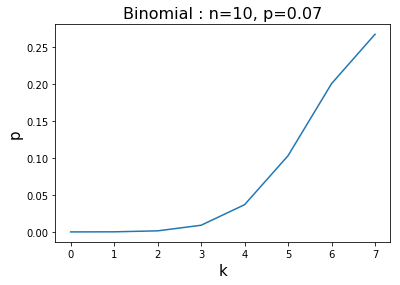

In [31]:
plt.plot(k,binom)
plt.title('Binomial : n=10, p=0.07',fontsize=16)
plt.xlabel('k',fontsize=15)
plt.ylabel('p',fontsize=15)


# Linear Regression


# Simple Linear Regression

Here we will try to see that if we can make a regression model to predict one column of a dataset by the use of other coloumn.

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

There is one unnamed column also in this dataset. Please remove and ignore that coloumn.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

# Question 8 
Read the dataset given in file named 'bigcity.csv'.

In [49]:
mydata = pd.read_csv('bigcity.csv')

In [51]:
mydata.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


# Question 9 - Transform the dataset 
Find the number of rows in given dataset and separate the input(u column)  and target variables(x column) into X and Y.

Remove the unnamed coloumn.

Hint: You can shape function to get the size of the dataframe


In [52]:
mydata.count()

Unnamed: 0    49
u             49
x             49
dtype: int64

In [53]:
X=mydata[['u']]
Y=mydata[['x']]
mydata.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [54]:
mydata = mydata.drop(mydata.columns[[0]],axis=1)

In [55]:
mydata.head()

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


## Question 10 - Check the dataset for any missing values and also print out the correlation matrix 

In [56]:
print(mydata.isna())

        u      x
0   False  False
1   False  False
2   False  False
3   False  False
4   False  False
5   False  False
6   False  False
7   False  False
8   False  False
9   False  False
10  False  False
11  False  False
12  False  False
13  False  False
14  False  False
15  False  False
16  False  False
17  False  False
18  False  False
19  False  False
20  False  False
21  False  False
22  False  False
23  False  False
24  False  False
25  False  False
26  False  False
27  False  False
28  False  False
29  False  False
30  False  False
31  False  False
32  False  False
33  False  False
34  False  False
35  False  False
36  False  False
37  False  False
38  False  False
39  False  False
40  False  False
41  False  False
42  False  False
43  False  False
44  False  False
45  False  False
46  False  False
47  False  False
48  False  False


In [ ]:
#Answer - No Missing values are in dataset

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [57]:
print(mydata.corr())

          u         x
u  1.000000  0.981742
x  0.981742  1.000000


### The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# Question 11 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [58]:
from sklearn.model_selection import train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [59]:
print (XTrain.shape,YTrain.shape)
print (XTest.shape,YTest.shape)


(39, 1) (39, 1)
(10, 1) (10, 1)


# Question 12 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

In [60]:
# Simple Linear Regression
#Load function from sklearn

from sklearn import linear_model


In [61]:
# Create linear regression object
regr = linear_model.LinearRegression()

# YTrain = mydata['XTrain']
# X = mydata['YTrain']

# Train the model using the training sets
regr.fit(XTrain,YTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
regr.coef_

array([[1.16465537]])

In [63]:
regr.intercept_

array([9.57115437])

Check: coef_ and intercept_ functions can help you get coefficients & intercept

# Question 13 - Linear Relationship between feature and target 
Plot the line with b1 and b0 as slope and y-intercept.

Hint - y = mx + c, plot y

In [64]:
m=regr.coef_
x=XTrain
c=regr.intercept_


In [65]:
y=m*x+c
print(y)

             u
11   63.145301
31   51.498748
33   87.603064
27  167.964285
48   51.498748
2    80.615132
46   59.651335
18  453.304850
15   95.755652
28  292.582409
22  600.051426
16   67.803923
41   74.791855
20  100.414273
42   56.157369
8    44.510815
13   38.687539
25   84.109098
5    52.663403
17   98.084962
35  209.891878
14  356.638454
38  150.494454
1   117.884104
12   92.261686
43  144.671177
24   99.249618
6    43.346160
23   67.803923
36   86.438409
21   79.450477
19  460.292782
9    11.900465
39   60.815991
45   59.651335
3   218.044465
0   170.293595
47  197.080669
44  110.896171


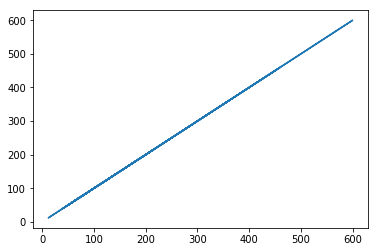

In [66]:
plt.plot(y,m*x+c)


# Question 14 - Evaluation of model with scikit-learn 
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean square error over mean square error gives you root mean square error

In [67]:
y_pred = regr.predict(XTest)

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(YTest, y_pred)

rmse = sqrt(mse)

In [68]:
print(rmse)

18.71070389373071


In [70]:
y_train = regr.predict(XTrain)
print(y_train)

[[ 63.14530135]
 [ 51.49874766]
 [ 87.6030641 ]
 [167.96428456]
 [ 51.49874766]
 [ 80.61513188]
 [ 59.65133524]
 [453.30484998]
 [ 95.75565168]
 [292.58240905]
 [600.05142648]
 [ 67.80392282]
 [ 74.79185504]
 [100.41427316]
 [ 56.15736913]
 [ 44.51081544]
 [ 38.6875386 ]
 [ 84.10909799]
 [ 52.66340303]
 [ 98.08496242]
 [209.89187785]
 [356.63845435]
 [150.49445403]
 [117.88410369]
 [ 92.26168557]
 [144.67117718]
 [ 99.24961779]
 [ 43.34616007]
 [ 67.80392282]
 [ 86.43840873]
 [ 79.45047651]
 [460.29278219]
 [ 11.90046511]
 [ 60.81599061]
 [ 59.65133524]
 [218.04446543]
 [170.2935953 ]
 [197.08066879]
 [110.89617148]]


## Question 15 - Calculate the accuracy of the model for both training and test data set 

### Hint: .score() function 

In [71]:
regr.score(YTest, y_pred)

0.9184241386370827

In [72]:
regr.score(YTrain, y_train)

0.8609496638413379